<h1>Import Libraries</h1>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [9]:
#load the data
df=pd.read_csv(r'Data_sets\Diet_Dataset.csv')

In [10]:
df.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,1,1,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,Avocados,1,0,0,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,1,0,0,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,1,1,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,1,1,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     231 non-null    object 
 1   Breakfast      231 non-null    int64  
 2   Lunch          231 non-null    int64  
 3   Dinner         231 non-null    int64  
 4   VegNovVeg      231 non-null    int64  
 5   Junk Food      231 non-null    int64  
 6   Calories       231 non-null    int64  
 7   Fats           231 non-null    float64
 8   Proteins       231 non-null    float64
 9   Iron           231 non-null    float64
 10  Calcium        231 non-null    float64
 11  Sodium         231 non-null    float64
 12  Potassium      231 non-null    float64
 13  Carbohydrates  231 non-null    float64
 14  Fibre          231 non-null    float64
 15  VitaminD       231 non-null    float64
 16  Sugars         231 non-null    float64
 17  Link           231 non-null    object 
dtypes: float64

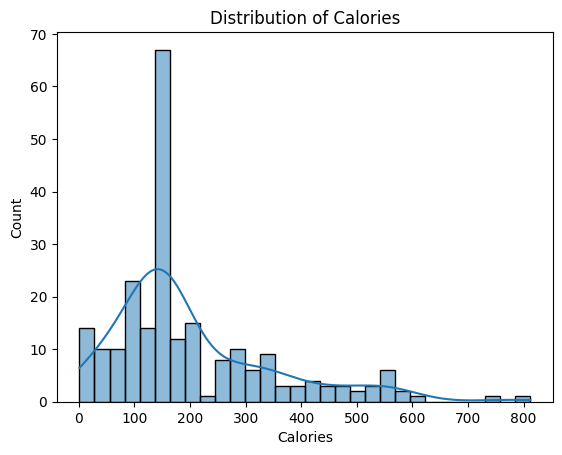

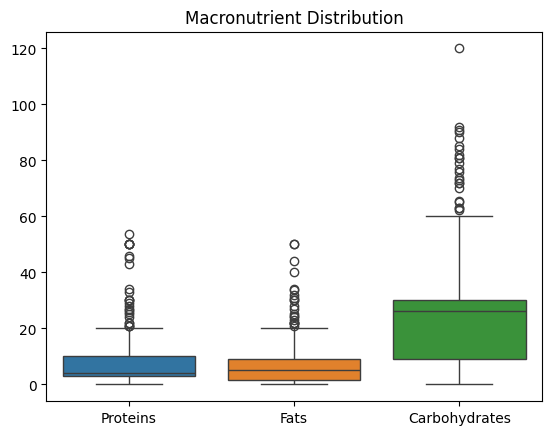

In [12]:
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Distribution of Calories")
plt.show()

sns.boxplot(data=df[['Proteins', 'Fats', 'Carbohydrates']])
plt.title("Macronutrient Distribution")
plt.show()

In [14]:
#define  nutritional categories  based on macros
def cateegorize_nutrition(row):
    if(row['Proteins']>row['Carbohydrates'] and row['Proteins']>row['Fats']):
        return 'High-Protein'
    elif row['Carbohydrates']>row['Proteins'] and row['Carbohydrates']>row['Fats']:
        return 'High-Carb'
    elif  row['Fats']>row['Carbohydrates'] and row['Fats']>row['Proteins']:
        return 'Balanced'
df['Nutrition_Type']=df.apply(cateegorize_nutrition,axis=1)

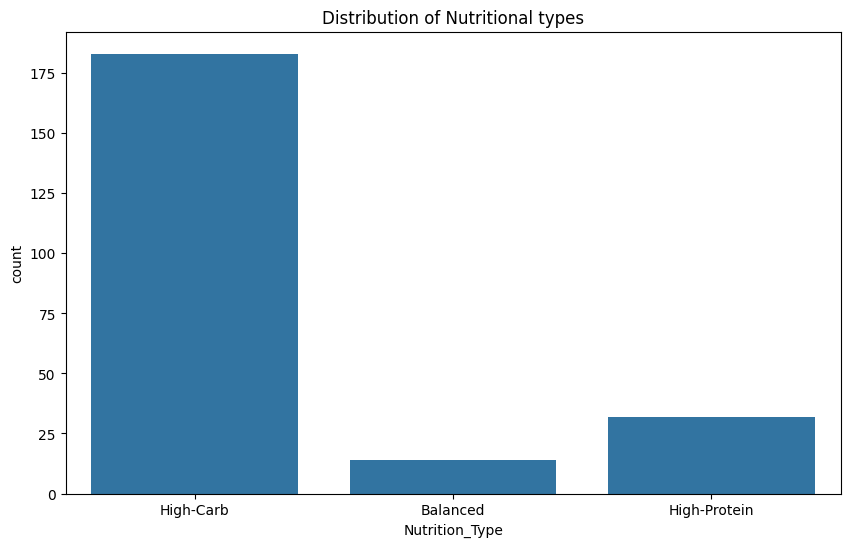

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Nutrition_Type')
plt.title("Distribution of Nutritional types")
plt.show()

C:\Users\samba\AppData\Local\Temp\ipykernel_11240\953163847.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


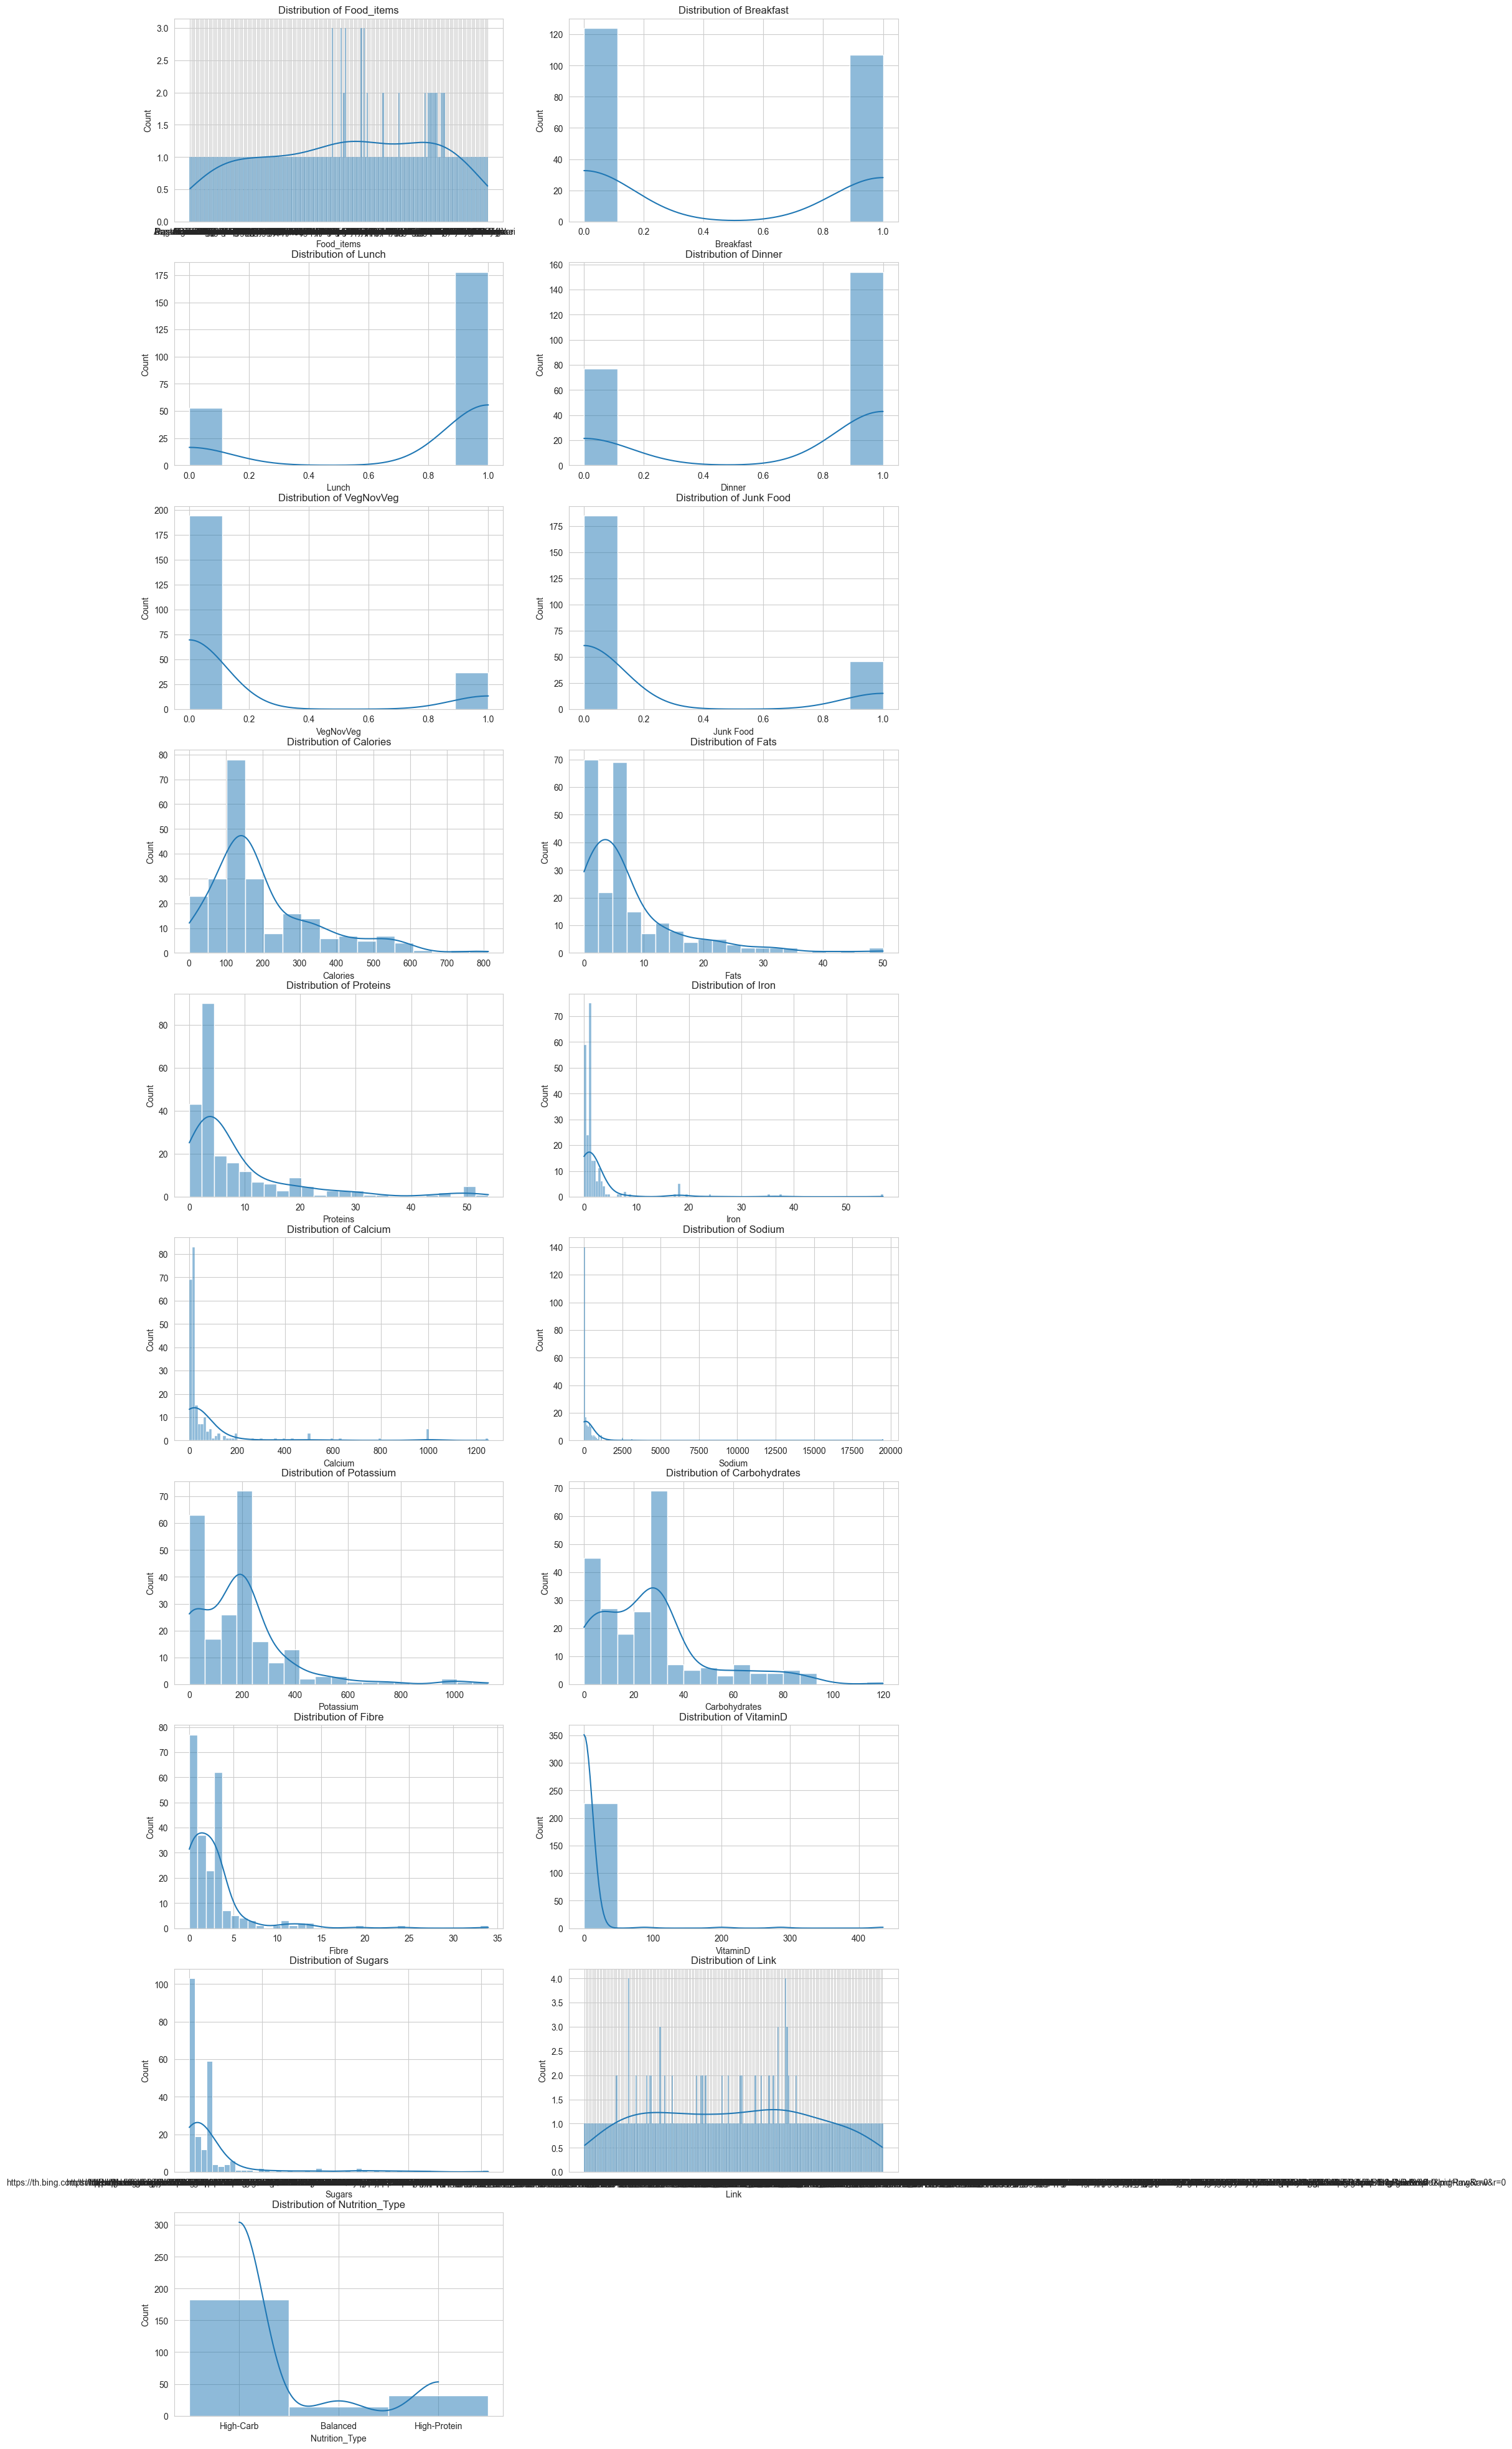

In [18]:
# set up visualization style
sns.set_style("whitegrid")

#clculate how many rows we ned(2 plots per row )
num_nutrients=len(df.columns)
n_rows= (num_nutrients+1)//2  #this ensures we round up

#create figure with appropriate size
plt.figure(figsize=(15,5*n_rows)) #5 units height per row

#plot distributions of key nutrients
for i, nutrient in enumerate(df.columns,1):
    plt.subplot(n_rows,2,i)  #n_rows , 2 columns
    sns.histplot(df[nutrient],kde=True)
    plt.title(f"Distribution of {nutrient}")
    plt.xlabel(nutrient)

plt.tight_layout()
plt.show()

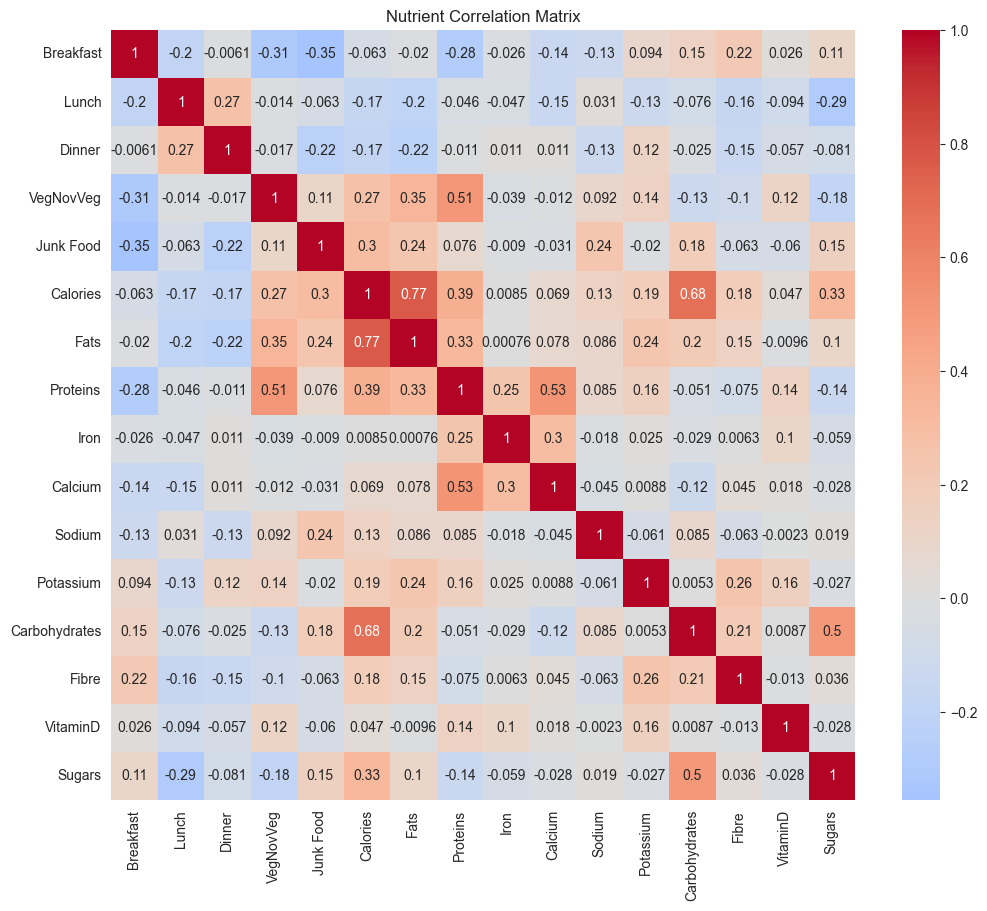

In [19]:
#correlation matrix
plt.figure(figsize=(12,10))
corr_matrix=df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center = 0)
plt.title("Nutrient Correlation Matrix")
plt.show()

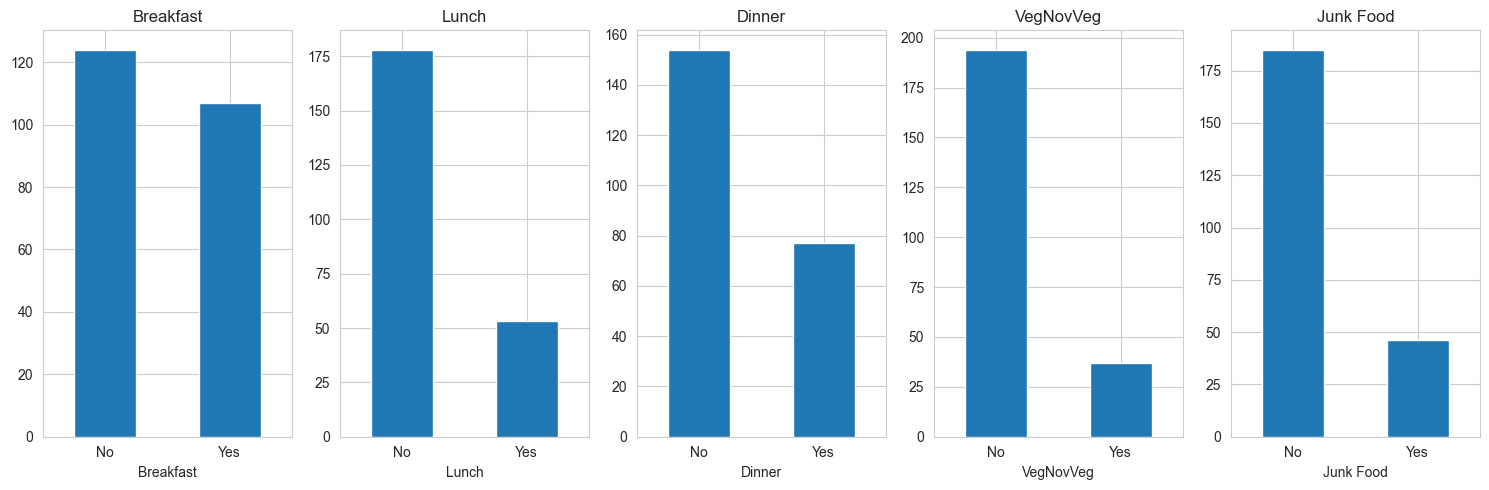

In [24]:
#plot food categories
categories= ['Breakfast','Lunch','Dinner','VegNovVeg','Junk Food']
plt.figure(figsize=(15,5))
for i , category in enumerate (categories,1):
    plt.subplot(1,5,i)
    df[category].value_counts().plot(kind='bar')
    plt.title(category)
    plt.xticks([0, 1],['No','Yes'], rotation=0)
plt.tight_layout()
plt.show()

In [29]:
breakfast_data = df[df['Breakfast'] ==1][['Food_items', 'VegNovVeg', 'Junk Food', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre','VitaminD', 'Sugars','Link']]

In [30]:
breakfast_data.head()

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
1,Avocados,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
6,Berries,0,0,349,0.4,14.0,6.80,190.0,298.0,77.0,77.0,13.0,0.0,46.0,https://th.bing.com/th/id/R.7b7c8a6bac9677484b...


In [31]:
breakfast_data.shape

(107, 15)

In [32]:
lunch_data=df[df['Lunch']==1][['Food_items', 'VegNovVeg', 'Junk Food', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre','VitaminD', 'Sugars','Link']]

In [33]:
lunch_data.head()

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [34]:
lunch_data.shape

(178, 15)

In [35]:
dinner_data=df[df['Dinner']==1][['Food_items', 'VegNovVeg', 'Junk Food', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre','VitaminD', 'Sugars','Link']]

In [36]:
dinner_data.head()

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [37]:
dinner_data.shape

(154, 15)

In [38]:
#load datssets 
breakfast_data.to_csv(r'Data_sets\Breakfast_data.csv',index=False)
lunch_data.to_csv(r'Data_sets\Lunch_data.csv',index=False)
lunch_data.to_csv(r'Data_sets\Dinner_data.csv',index=False)

In [39]:
# Load datasets
breakfast = pd.read_csv('Data_Sets/Breakfast_data.csv')
lunch = pd.read_csv('Data_Sets/Lunch_data.csv')
dinner = pd.read_csv('Data_Sets/Dinner_data.csv')

In [40]:
#quick preview
display(breakfast.head())

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Avocados,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
1,Bananas,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
2,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
3,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
4,Berries,0,0,349,0.4,14.0,6.80,190.0,298.0,77.0,77.0,13.0,0.0,46.0,https://th.bing.com/th/id/R.7b7c8a6bac9677484b...


In [41]:
display(lunch.head())

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
2,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
3,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
4,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [42]:
display(dinner.head())

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
2,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
3,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
4,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [43]:
def prepare_data(df):
    '''Select nutritional features and clean data'''
    features=df[['Calories','Proteins','Carbohydrates','Fats']]
    return features.dropna()
#prepare data for each meal
pf_features= prepare_data(breakfast)
in_features= prepare_data(lunch)
dh_features= prepare_data(dinner)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_kmeans_metrics(data,max_k=8):
    """Returns WCSS, silhoutte scores, best k from both methods"""
    wcss=[]
    silhouette_score=[]
    for k in range(2,max_k=8):
        kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
        labels= kmeans.fit_predict(data)
        wcss.append(kmeans.inertia_)
        silhouette_score.append(silhouette_score(data,labels))

    elbow_deltas=np.diff(wcss,2) 
    elbow_k=np.argmax(elbow_deltas)+3 if len(elbow_deltas)>0 else 2
    sil_k=np.argmax(silhouette_score)

    return wcss, silhouette_score,elbow_k,sil_k

def plot_elbow_silhoutte_all():
    plt.figure(figsize=(18,10))
    datasets=[
        ('Breakfast',bf_features,'orange'),
        ('Lunch',ln_features,'green'),
        ('Dinner',dn_features,'blue'),
    ]
    for i, (label, data, color) in enumerate(datasets):
        wcss,sils,elbow_k, sil_k=get_kmeans_metrics(data)
        k_range=list(range(2,len(wcss)+2))

        #elbow plot
        plt.subplot(2,3,i+1)
        plt.plot(k_range,wcss,marker='o',color=color)
        plt.axvline(x=elbow_k,color='red',linestyle='--',label=f'Best k={elbow_k}')
        plt.title(f'Elbow method -{label}')
        plt.xlabel('Number of clusters(k)')
        plt.ylabel('WCSS')

        #silhoutte plot
        plt.subplot(2,3,i+4)
        plt.plot(k_range,wcss,marker='x',color=color)
        plt.axvline(x=sil_k,color='red',linestyle='--',label=f'Best k={sil_k}')
        plt.title(f'Silhoutte Score -{label}')
        plt.xlabel('Number of clusters(k)')
        plt.ylabel('Silhputte Score')
    
    plt.tight_layout()
plt.show()